# IMPORTING DEPENDENCIES

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.54.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 M

In [3]:
!pip list

Package                      Version
---------------------------- -------------
anyio                        3.6.2
apturl                       0.5.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
attrs                        22.2.0
awscli                       1.22.34
backcall                     0.2.0
bcrypt                       3.2.0
beautifulsoup4               4.11.2
bleach                       6.0.0
blinker                      1.4
botocore                     1.23.34
Brlapi                       0.8.3
certifi                      2020.6.20
cffi                         1.15.1
chardet                      4.0.0
click                        8.0.3
colorama                     0.4.4
comm                         0.1.2
command-not-found            0.3
configobj                    5.0.6
cryptography                 3.4.8
cupshelpers                  1.0
dbus-python                  1.2.18
de

In [87]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [88]:
import tensorflow as tf
import os

In [89]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [90]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [91]:
gpus

[]

In [92]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [93]:
import cv2

print(cv2.__version__)


4.7.0


# PRE PROCESSING

In [94]:
import cv2
import imghdr

In [142]:
data_dir='./Downloads/data'

In [143]:
os.listdir(data_dir)

['undamaged', 'damaged']

In [144]:
image_exts=['jpeg','jpg','bmp','png']

In [145]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [146]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [147]:
import numpy as np

In [148]:
data = tf.keras.utils.image_dataset_from_directory('./Downloads/data')

Found 1840 files belonging to 2 classes.


In [149]:
data_iterator

In [150]:
data_iterator = data.as_numpy_iterator()


2023-05-29 14:17:17.752007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1840]
	 [[{{node Placeholder/_4}}]]
2023-05-29 14:17:17.752159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1840]
	 [[{{node Placeholder/_4}}]]


In [153]:
batch = data_iterator.next()

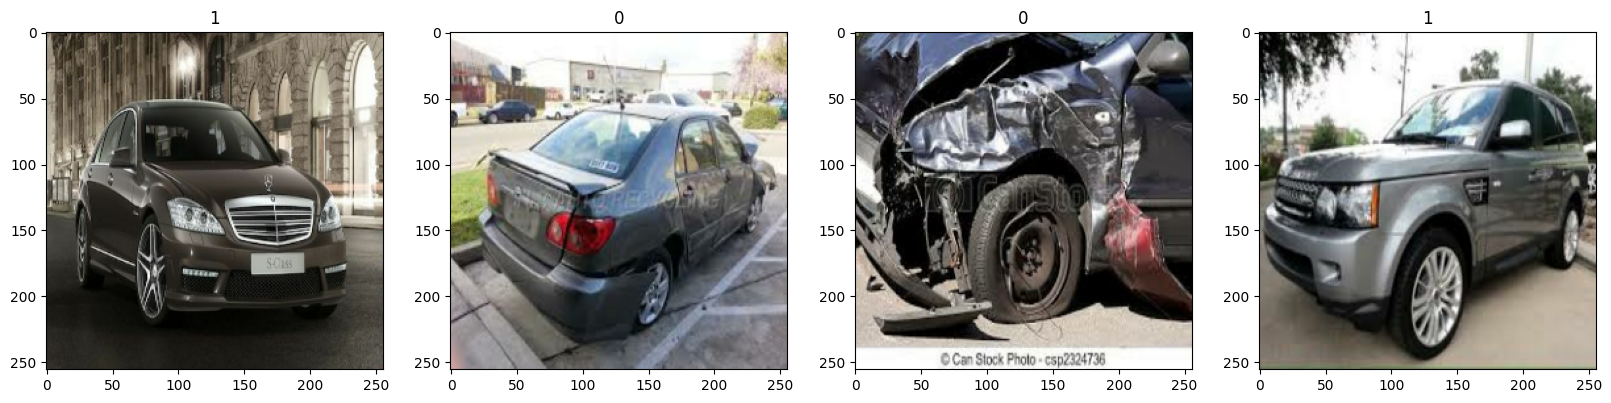

In [154]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    #CLASS 0 DAMAGED CARS
    #CLASS 1 UNDAMAGED CARS

In [155]:
batch

(array([[[[1.38391174e+02, 1.29391174e+02, 1.12391174e+02],
          [1.48263428e+02, 1.39263428e+02, 1.22263428e+02],
          [1.30382324e+02, 1.21382324e+02, 1.05101074e+02],
          ...,
          [1.76261902e+02, 1.67980652e+02, 1.50261902e+02],
          [1.61738525e+02, 1.47769775e+02, 1.36268677e+02],
          [1.70342041e+02, 1.48572510e+02, 1.43182251e+02]],
 
         [[1.40724304e+02, 1.31724304e+02, 1.14724304e+02],
          [1.35676575e+02, 1.26676575e+02, 1.09676575e+02],
          [1.36967163e+02, 1.27967163e+02, 1.11685913e+02],
          ...,
          [1.72433899e+02, 1.64565552e+02, 1.46020996e+02],
          [1.19342102e+02, 1.06017883e+02, 9.10474854e+01],
          [1.32229370e+02, 1.12523987e+02, 1.00651245e+02]],
 
         [[1.37858948e+02, 1.28858948e+02, 1.11858948e+02],
          [1.25598511e+02, 1.16598511e+02, 9.95985107e+01],
          [1.55188721e+02, 1.46188721e+02, 1.29907471e+02],
          ...,
          [1.04510742e+02, 9.67008057e+01, 7.7599

In [156]:
len(batch)

2

In [157]:
batch[0]

array([[[[1.38391174e+02, 1.29391174e+02, 1.12391174e+02],
         [1.48263428e+02, 1.39263428e+02, 1.22263428e+02],
         [1.30382324e+02, 1.21382324e+02, 1.05101074e+02],
         ...,
         [1.76261902e+02, 1.67980652e+02, 1.50261902e+02],
         [1.61738525e+02, 1.47769775e+02, 1.36268677e+02],
         [1.70342041e+02, 1.48572510e+02, 1.43182251e+02]],

        [[1.40724304e+02, 1.31724304e+02, 1.14724304e+02],
         [1.35676575e+02, 1.26676575e+02, 1.09676575e+02],
         [1.36967163e+02, 1.27967163e+02, 1.11685913e+02],
         ...,
         [1.72433899e+02, 1.64565552e+02, 1.46020996e+02],
         [1.19342102e+02, 1.06017883e+02, 9.10474854e+01],
         [1.32229370e+02, 1.12523987e+02, 1.00651245e+02]],

        [[1.37858948e+02, 1.28858948e+02, 1.11858948e+02],
         [1.25598511e+02, 1.16598511e+02, 9.95985107e+01],
         [1.55188721e+02, 1.46188721e+02, 1.29907471e+02],
         ...,
         [1.04510742e+02, 9.67008057e+01, 7.75999146e+01],
         [

In [158]:
batch[0].shape

(32, 256, 256, 3)

In [159]:
batch[1]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int32)

In [160]:
scaled=batch[0]/255

In [161]:
scaled.max()

1.0

In [162]:
scaled.min()

0.0

In [163]:
data = data.map(lambda x,y: (x/255, y))

In [166]:
data.as_numpy_iterator().next()[0].min()

0.0

In [165]:
len(data)

58

# DIVIDING IN TRAINING AND TESTING

In [167]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [168]:
train_size

34

In [169]:
test_size

11

In [170]:
val_size

11

In [171]:
test_size+train_size+val_size

56

In [172]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [173]:
len(train)

34

In [174]:
len(test)

11

In [175]:
len(val)

11

# BUILDING MODEL

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [177]:
MaxPooling2D??

In [178]:
model = Sequential()

In [179]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [180]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [181]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# TRAIN

In [182]:
 logdir='logs'

In [183]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [184]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40


2023-05-29 14:18:33.548603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1840]
	 [[{{node Placeholder/_4}}]]
2023-05-29 14:18:33.548762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1840]
	 [[{{node Placeholder/_4}}]]


34/34 [==============================] - ETA: 0s - loss: 0.7248 - accuracy: 0.5892

2023-05-29 14:18:38.234501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1840]
	 [[{{node Placeholder/_4}}]]
2023-05-29 14:18:38.234699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1840]
	 [[{{node Placeholder/_4}}]]


34/34 [==============================] - 6s 148ms/step - loss: 0.7248 - accuracy: 0.5892 - val_loss: 0.5645 - val_accuracy: 0.7045
Epoch 2/40
34/34 [==============================] - 5s 152ms/step - loss: 0.5109 - accuracy: 0.7675 - val_loss: 0.5366 - val_accuracy: 0.7415
Epoch 3/40
34/34 [==============================] - 5s 149ms/step - loss: 0.4446 - accuracy: 0.8024 - val_loss: 0.4922 - val_accuracy: 0.7301
Epoch 4/40
34/34 [==============================] - 5s 148ms/step - loss: 0.3522 - accuracy: 0.8529 - val_loss: 0.3814 - val_accuracy: 0.8580
Epoch 5/40
34/34 [==============================] - 5s 149ms/step - loss: 0.3051 - accuracy: 0.8667 - val_loss: 0.4949 - val_accuracy: 0.7699
Epoch 6/40
34/34 [==============================] - 5s 150ms/step - loss: 0.2549 - accuracy: 0.9044 - val_loss: 0.3620 - val_accuracy: 0.8551
Epoch 7/40
34/34 [==============================] - 5s 149ms/step - loss: 0.1828 - accuracy: 0.9375 - val_loss: 0.3708 - val_accuracy: 0.8580
Epoch 8/40
34/34 

# PLOT PERFORMANCE 

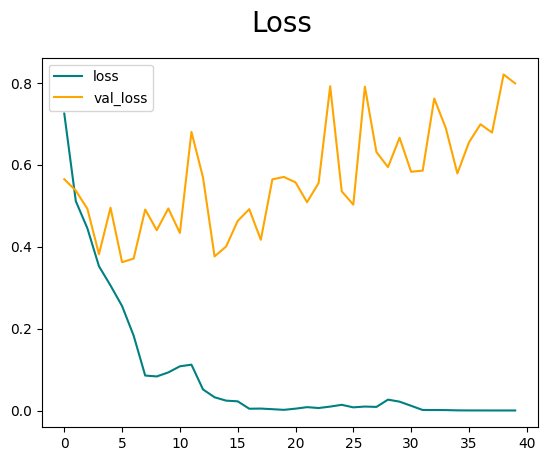

In [186]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

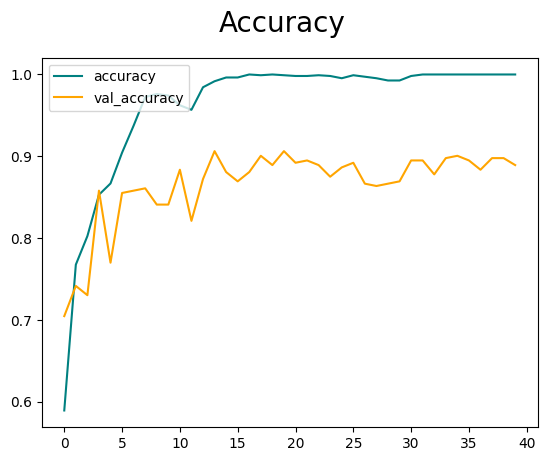

In [187]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# EVALUATE

In [188]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [189]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [190]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-05-29 14:27:50.323863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1840]
	 [[{{node Placeholder/_4}}]]
2023-05-29 14:27:50.324033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1840]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 46ms/step


In [191]:
print(f'PRECISION:{pre.result().numpy()}, RECALL:{re.result().numpy()}, ACCURACY:{acc.result().numpy()}')

PRECISION:0.8225806355476379, RECALL:0.8500000238418579, ACCURACY:0.8295454382896423


# TEST

In [192]:
import cv2

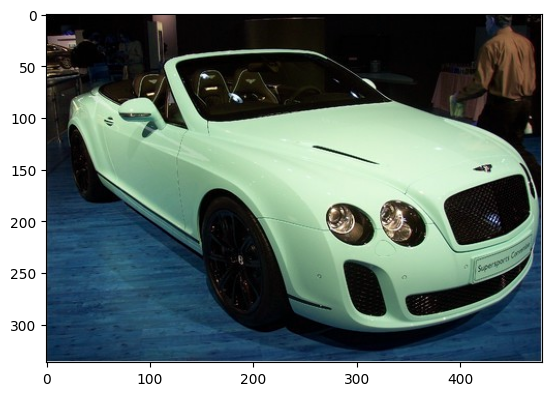

In [205]:
img = cv2.imread('./Downloads/UNDAMAGED_TEST.jpg')
plt.imshow(img)
plt.show()

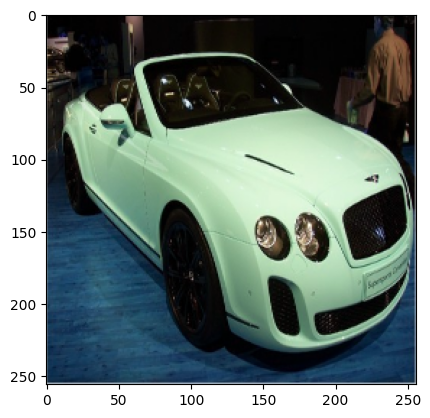

In [206]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [207]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [208]:
yhat


array([[0.9999978]], dtype=float32)

In [209]:
if yhat > 0.5: 
    print(f'Predicted class is UNDAMAGED')
else:
    print(f'Predicted class is DAMAGED')

Predicted class is UNDAMAGED


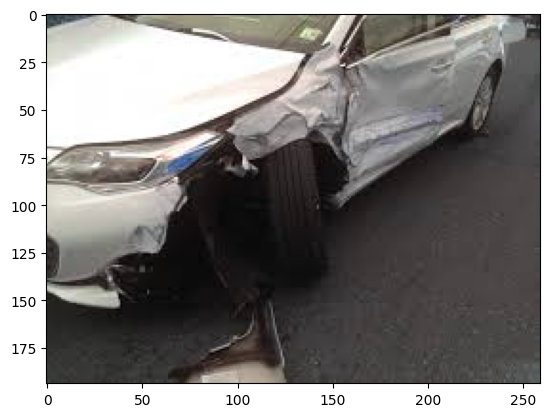

In [212]:
img = cv2.imread('./Downloads/DAMAGED_TEST.JPEG')
plt.imshow(img)
plt.show()

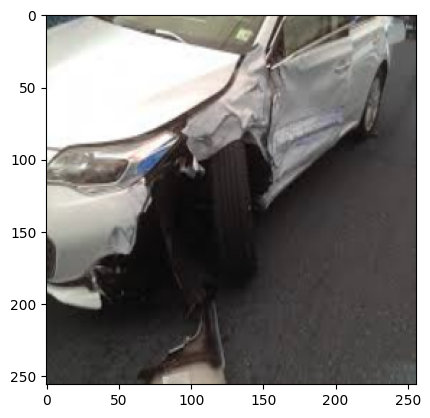

In [213]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [214]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 10ms/step


In [215]:
yhat

array([[0.00016256]], dtype=float32)

In [216]:
if yhat > 0.5: 
    print(f'Predicted class is UNDAMAGED')
else:
    print(f'Predicted class is DAMAGED')

Predicted class is DAMAGED
